# Eurovision - some insights

Years: 2009-2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
euro_df = pd.read_csv('song_data.csv')
regions = pd.read_csv('country_data.csv')

In [3]:
euro_df = euro_df.replace('unknown', np.nan)

In [4]:
euro_df = euro_df.drop(['direct_qualifier_10', 'age', 'selection', 'release_date', 'key_change_10', 'race', 'semi_final'], axis=1)

In [5]:
euro_df = euro_df.merge(regions, how = 'left', on = 'country')

In [6]:
finalists = euro_df[euro_df['qualified_10'] != '0']

In [7]:
finalists = finalists.drop(['semi_draw_position', 'qualified_10', 'semi_place', 'semi_televote_points', 'semi_jury_points', 
                           'semi_total_points'], axis=1)

### Which countries are the most consistent?

In [8]:
countries = finalists.groupby(['country', 'region']).agg({'country': 'count', 'final_place': 'mean', 'final_total_points': 'mean', 
                                               'final_televote_points': 'mean', 'final_jury_points': 'mean'})
countries.columns = ['Participation #', 'Avg place', 'Avg total points', 'Avg televote pts', 'Avg jury pts']
display(countries.sort_values('Avg place').round(2).head(10))
print('And how does it look at the bottom of the standings..?')
display(countries.sort_values('Avg place', ascending = False).round(2).head(10))

,,Participation #,Avg place,Avg total points,Avg televote pts,Avg jury pts
country,region,,,,,
Turkey,Eastern Europe,3,4.33,279.67,185.33,94.33
Sweden,Scandanavia,13,6.46,337.85,170.00,196.00
Italy,Western Europe,12,6.83,294.08,155.36,165.45
Russia,Eastern Europe,10,6.90,272.30,188.44,114.11
Bulgaria,Eastern Europe,4,7.75,314.50,153.25,161.25
Ukraine,Eastern Europe,12,8.67,244.17,163.82,102.55
Netherlands,Western Europe,8,9.25,139.50,64.83,119.17
North Macedonia,Eastern Europe,2,10.00,152.50,58.00,247.00
Belgium,Western Europe,8,10.12,187.62,90.14,124.29


And how does it look at the bottom of the standings..?


,,Participation #,Avg place,Avg total points,Avg televote pts,Avg jury pts
country,region,,,,,
San Marino,Western Europe,3,21.50,54.00,31.33,21.33
Belarus,Eastern Europe,5,19.40,52.00,28.50,36.50
United Kingdom,Western Europe,14,19.14,100.64,50.67,66.75
Spain,Western Europe,14,18.93,100.86,51.54,57.08
Germany,Western Europe,14,18.64,105.79,57.62,56.31
Ireland,Western Europe,5,18.40,107.20,66.75,67.25
Slovenia,Eastern Europe,6,18.33,90.83,37.17,53.67
Croatia,Eastern Europe,3,18.00,104.67,63.67,41.00
Finland,Scandanavia,8,16.88,153.12,119.14,55.86


<AxesSubplot:xlabel='Avg total points', ylabel='country'>

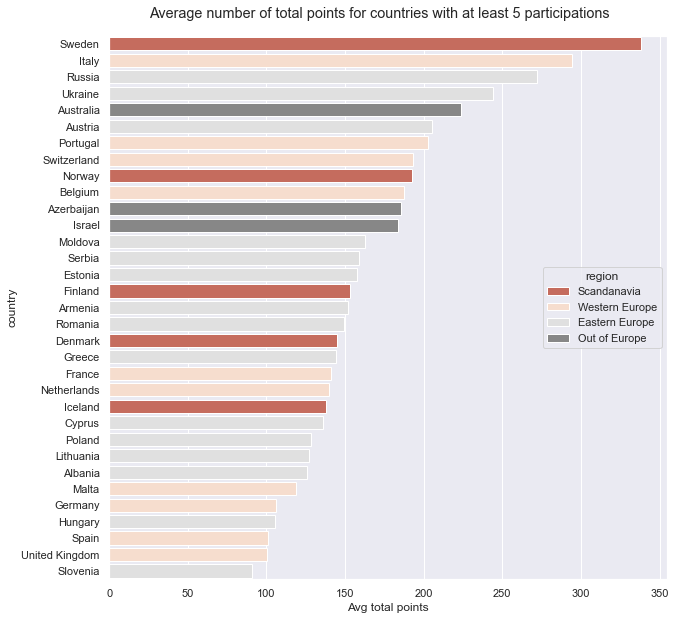

In [9]:
countries = countries.reset_index()
plt.figure(figsize=(10,10))
sn.set_theme(style = 'darkgrid')
plt.suptitle('Average number of total points for countries with at least 5 participations', y = 0.92)
sn.barplot(data = countries[countries['Participation #'] > 5].sort_values('Avg total points', ascending = False), 
           x = 'Avg total points', y = 'country', hue = 'region', dodge = False, palette = 'RdGy')

### Are there regional differences?

In [10]:
regions = finalists.groupby(['region'])[['final_place', 'final_total_points']].mean()
regions.columns = ['Avg place', 'Avg total points']
regions.sort_values('Avg place').round(2)

,Avg place,Avg total points
region,,
Scandanavia,11.44,206.62
Out of Europe,11.62,185.88
Eastern Europe,13.16,159.36
Western Europe,15.13,148.46


### Is genre of the song important?

<AxesSubplot:xlabel='style', ylabel='final_total_points'>

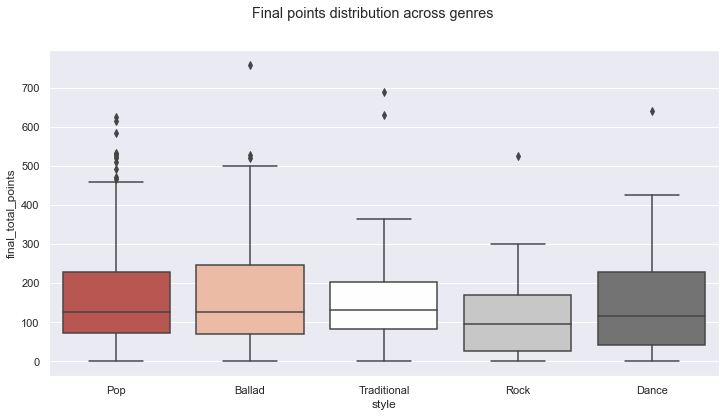

In [11]:
plt.figure(figsize=(12,6))
plt.suptitle('Final points distribution across genres')
sn.boxplot(data = finalists[finalists['style'] != 'Opera'], x = 'style', y = 'final_total_points', palette = 'RdGy')

In [12]:
genres = finalists.groupby(['style']).agg({'style': 'count', 'final_place': 'mean', 'final_jury_points': 'mean', 
                                          'final_televote_points': 'mean', 'final_total_points': 'mean'})
genres.columns = ['N', 'Avg final place', 'Avg jury points', 'Avg televote points', 'Avg total points']
genres['Jury-televote diff'] = genres['Avg jury points'] - genres['Avg televote points']
genres.sort_values('Avg final place').round(2)

,N,Avg final place,Avg jury points,Avg televote points,Avg total points,Jury-televote diff
style,,,,,,
Opera,3,10.00,107.00,112.00,219.00,-5.00
Ballad,98,12.66,107.24,80.04,172.12,27.20
Traditional,29,12.86,71.69,117.54,169.66,-45.85
Pop,163,13.44,91.64,88.27,168.69,3.38
Dance,39,14.05,67.09,113.79,155.76,-46.70
Rock,27,15.74,74.29,78.14,118.56,-3.86


<AxesSubplot:xlabel='style', ylabel='Jury-televote diff'>

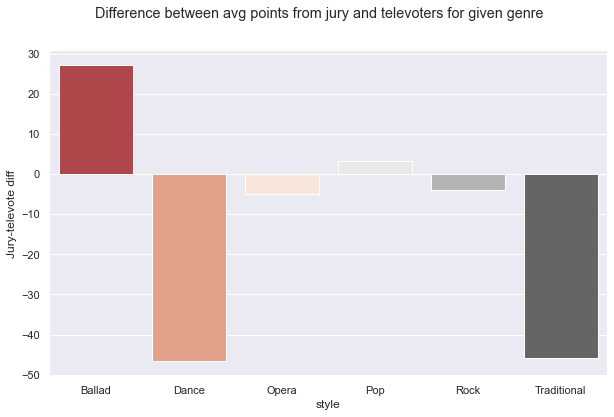

In [13]:
plt.figure(figsize=(10,6))
plt.suptitle('Difference between avg points from jury and televoters for given genre')
sn.barplot(data = genres.reset_index(), x = 'style', y = 'Jury-televote diff', palette = 'RdGy')

Ballads are the most successful at eurovision, but this seems to be the case mainly due to jury preferences. Televoters are more keen on Dance and Traditional styles. 

### Is it better to sing in English or in a native language?

In [14]:
def language(x):
    if x == 'English': return 'English'
    elif x.find(',') > 0: return 'Mixed' #if there is a comma it means that more than 1 language was used in a song
    else: return 'Native'

In [15]:
finalists['language2'] = finalists['language'].apply(language)

<AxesSubplot:xlabel='language2', ylabel='final_total_points'>

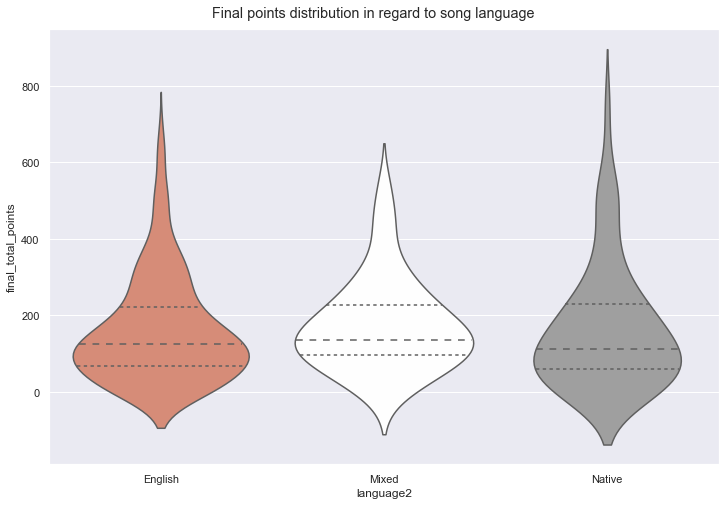

In [16]:
plt.figure(figsize = (12,8))
plt.suptitle('Final points distribution in regard to song language', y = 0.92)
sn.violinplot(data = finalists, x = 'language2', y = 'final_total_points', inner="quart", fill=False, palette = 'RdGy')

In [17]:
languages = finalists.groupby(['language2']).agg({'language2': 'count', 'final_place': 'mean', 'final_televote_points': 'mean',
                                                 'final_jury_points': 'mean', 'final_total_points': 'mean'})
languages.columns = ['N', 'Avg place', 'Avg televote points', 'Avg jury points', 'Avg total points']
languages['Jury-televote diff'] = languages['Avg jury points'] - languages['Avg televote points']
languages.sort_values('Avg place').round(2)

,N,Avg place,Avg televote points,Avg jury points,Avg total points,Jury-televote diff
language2,,,,,,
Mixed,39,12.74,94.41,80.31,175.03,-14.10
English,243,13.41,86.01,93.17,162.54,7.15
Native,77,13.65,102.90,89.58,167.48,-13.31


<AxesSubplot:xlabel='language2', ylabel='Jury-televote diff'>

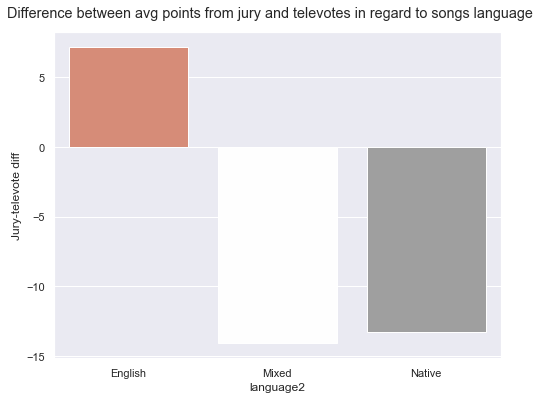

In [18]:
plt.figure(figsize=(8,6))
plt.suptitle('Difference between avg points from jury and televotes in regard to songs language', y = 0.94)
sn.barplot(data = languages.reset_index(), x = 'language2', y = 'Jury-televote diff', palette = 'RdGy')

### Which song characteristics are associated with good final score?

In [19]:
finalists = finalists.drop('loudness', axis = 1)

In [20]:
finalists.iloc[:,10:18] = finalists.iloc[:,10:19].replace('-', np.nan)
finalists.iloc[:,10:18] = finalists.iloc[:,10:19].astype(float)

<AxesSubplot:xlabel='speechiness', ylabel='final_total_points'>

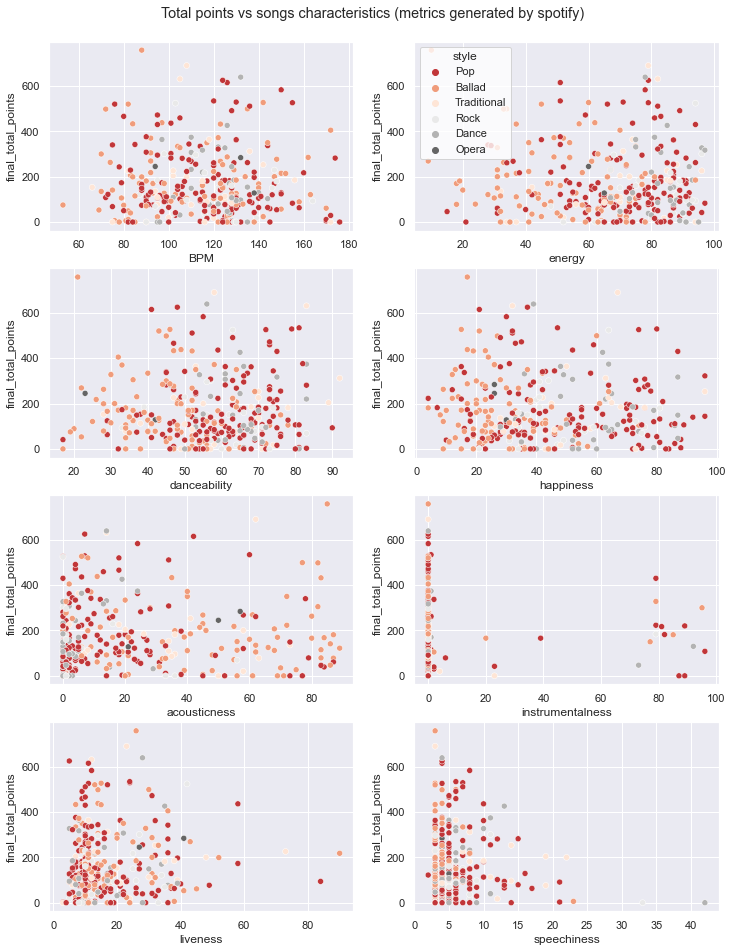

In [21]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize = (12,16))
sn.set_theme(style = 'white', palette = 'RdGy')
fig.suptitle('Total points vs songs characteristics (metrics generated by spotify)', y = 0.91)
sn.scatterplot(data = finalists, x = 'BPM', y = 'final_total_points', hue = 'style', ax = ax1, legend = False)
sn.scatterplot(data = finalists, x = 'energy', y = 'final_total_points', hue = 'style', ax = ax2)
sn.scatterplot(data = finalists, x = 'danceability', y = 'final_total_points', hue = 'style', ax = ax3, legend = False)
sn.scatterplot(data = finalists, x = 'happiness', y = 'final_total_points', hue = 'style', ax = ax4, legend = False)
sn.scatterplot(data = finalists, x = 'acousticness', y = 'final_total_points', hue = 'style', ax = ax5, legend = False)
sn.scatterplot(data = finalists, x = 'instrumentalness', y = 'final_total_points', hue = 'style', ax = ax6, legend = False)
sn.scatterplot(data = finalists, x = 'liveness', y = 'final_total_points', hue = 'style', ax = ax7, legend = False)
sn.scatterplot(data = finalists, x = 'speechiness', y = 'final_total_points', hue = 'style', ax = ax8, legend = False)

<AxesSubplot:>

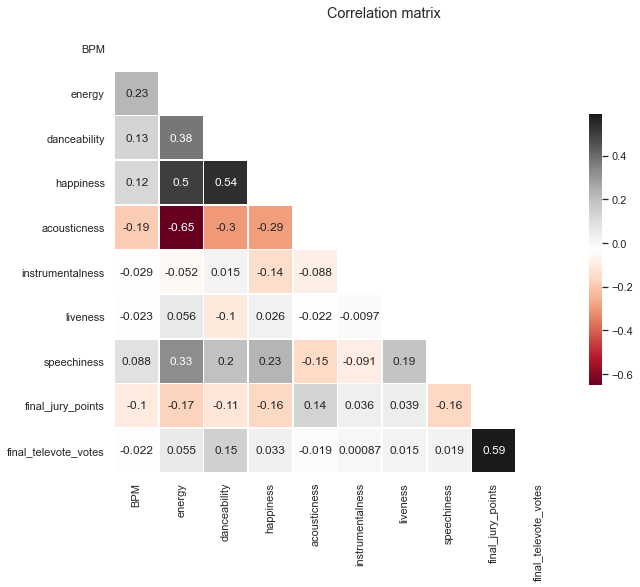

In [22]:
corr = finalists[['BPM', 'energy', 'danceability', 'happiness', 'acousticness', 'instrumentalness', 'liveness', 'speechiness',
                 'final_jury_points', 'final_televote_votes']].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Correlation matrix', y = 0.84)
sn.heatmap(corr, annot=True, mask=mask, cmap='RdGy', square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Is there a home advantage?

In [23]:
host = finalists.groupby(['host_10']).agg({'final_place': 'mean', 'final_jury_points': 'mean', 'final_televote_points': 'mean',
                                          'final_total_points': 'mean'})
host.columns = ['Avg final place', 'Avg jury points', 'Avg televote points', 'Avg total points']
host.index = ['Others', 'Host']
host.round(2)

,Avg final place,Avg jury points,Avg televote points,Avg total points
Others,13.31,92.33,91.48,167.03
Host,15.29,56.23,66.15,114.50


Not really...

### Are bookmakers good at predicting the winner?

In [24]:
finalists['winner'] = [1 if x == 1 else 0 for x in finalists['final_place']]
finalists['top_3'] = [1 if x < 4 else 0 for x in finalists['final_place']]

In [25]:
finalists.loc[(finalists['winner'] == 1) & (finalists['favourite_10'] == 1)]

,year,final_draw_position,country,artist_name,song_name,language,style,gender,main_singers,key,BPM,energy,danceability,happiness,acousticness,instrumentalness,liveness,speechiness,backing_dancers,backing_singers,backing_instruments,instrument_10,final_televote_points,final_jury_points,final_televote_votes,final_jury_votes,final_place,final_total_points,favourite_10,host_10,region,language2,winner,top_3
10,2023,9,Sweden,Loreen,Tattoo,English,Pop,Female,1,Eb Minor,150.0,78.0,55.0,30.0,24.0,0.0,12.0,8.0,0,0,0,0,243.0,340.0,36.0,36.0,1.0,583.0,1,0,Scandanavia,English,1,1
42,2022,12,Ukraine,Kalush Orchestra,Stefania,Ukrainian,Traditional,Male,1,D Major,105.0,82.0,83.0,32.0,14.0,0.0,12.0,4.0,1,2,2,0,439.0,192.0,39.0,26.0,1.0,631.0,1,0,Eastern Europe,Native,1,1
148,2019,12,Netherlands,Duncan Laurence,Arcade,English,Ballad,Male,1,A Minor,72.0,33.0,45.0,27.0,82.0,0.0,14.0,4.0,0,0,0,1,261.0,237.0,40.0,32.0,1.0,498.0,1,0,Western Europe,English,1,1
163,2018,22,Israel,Netta,Toy,English,Pop,Female,1,Eb Minor,130.0,71.0,79.0,80.0,7.0,0.0,24.0,7.0,3,0,0,0,317.0,212.0,39.0,34.0,1.0,529.0,1,0,Out of Europe,English,1,1
312,2015,10,Sweden,Mans Zelmerlow,Heroes,English,Pop,Male,1,G Major,124.0,79.0,48.0,37.0,7.0,0.0,5.0,4.0,0,0,0,0,353.0,272.0,38.0,37.0,1.0,625.0,1,0,Scandanavia,English,1,1
364,2013,18,Denmark,Emmelie de Forest,Only Teardrops,English,Pop,Female,1,C Major,128.0,86.0,62.0,23.0,0.0,89.0,36.0,3.0,0,3,2,0,NaN,NaN,NaN,NaN,1.0,0.0,1,0,Scandanavia,English,1,1
427,2012,17,Sweden,Loreen,Euphoria,English,Dance,Female,1,B Minor,132.0,78.0,56.0,39.0,14.0,0.0,28.0,4.0,1,0,0,0,343.0,296.0,NaN,NaN,1.0,639.0,1,0,Scandanavia,English,1,1
522,2010,22,Germany,Lena,Satellite,English,Pop,Female,1,E Minor,95.0,94.0,75.0,87.0,0.0,79.0,10.0,5.0,0,4,0,0,243.0,187.0,NaN,NaN,1.0,430.0,1,0,Western Europe,English,1,1
546,2009,20,Norway,Alexander Rybak,Fairytale,English,Traditional,Male,1,D Minor,108.0,79.0,58.0,67.0,62.0,0.0,23.0,3.0,3,2,0,1,378.0,312.0,NaN,NaN,1.0,690.0,1,0,Scandanavia,English,1,1


Quite good, they predicted 9/14 winners correctly. 

### Is there a gender gap?

<AxesSubplot:xlabel='gender', ylabel='final_total_points'>

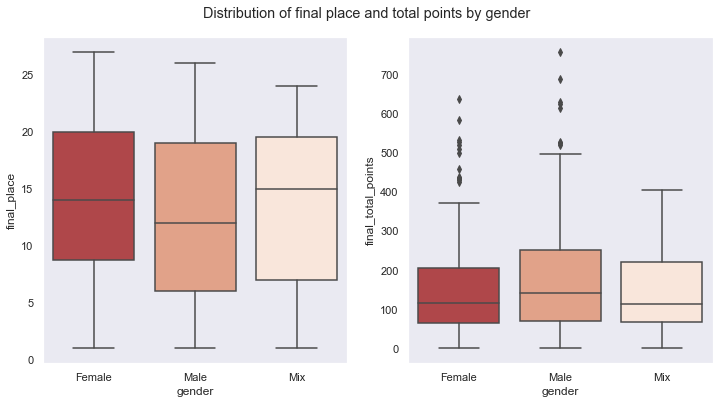

In [26]:
sn.set_theme(style = 'dark', palette = 'RdGy')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,6))
plt.suptitle('Distribution of final place and total points by gender', y = 0.95)
sn.boxplot(data = finalists, x = 'gender', y = 'final_place', ax = ax1)
sn.boxplot(data = finalists, x = 'gender', y = 'final_total_points', ax = ax2)

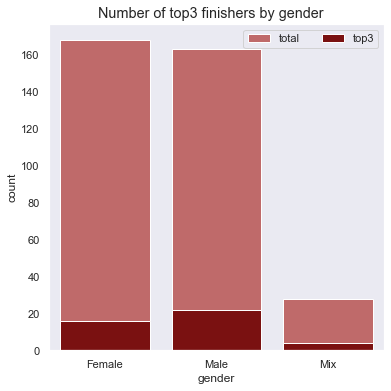

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
sn.countplot(data = finalists, x = 'gender', label = 'total', color = 'indianred')
sn.countplot(data = finalists.loc[finalists['top_3'] == 1], x = 'gender', label = 'top3', color = 'darkred')
plt.suptitle('Number of top3 finishers by gender', y = 0.92)
ax.legend(ncol=2, loc="upper right", frameon=True)

Yes, it seems that males have a little bit better results. They finish in top3 more often, even though overall more woman compete. Maybe it's due to differences in the genre choices.

<AxesSubplot:xlabel='style', ylabel='count'>

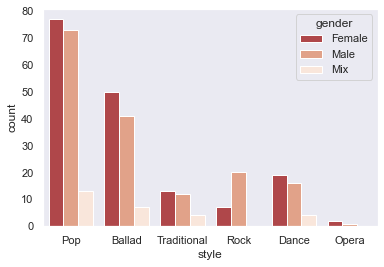

In [28]:
sn.countplot(data = finalists, x = 'style', hue = 'gender')

No, the most popular genres are picked more often by woman. 

### Do people prefer sad or cheerful songs? (minor vs major key)

In [29]:
finalists['key'] = finalists['key'].replace('-', np.nan)
finalists['key2'] = finalists['key'].str.split(expand = True)[1]
finalists['key2'].value_counts()

Minor    177
Major    143
Name: key2, dtype: int64

<AxesSubplot:xlabel='key2', ylabel='final_televote_points'>

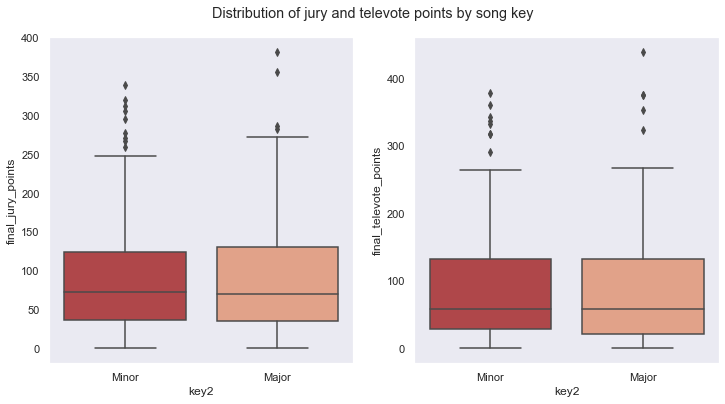

In [30]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,6))
plt.suptitle('Distribution of jury and televote points by song key', y = 0.95)
sn.boxplot(data = finalists, y = 'final_jury_points', x = 'key2', ax = ax1)
sn.boxplot(data = finalists, y = 'final_televote_points', x = 'key2', ax = ax2)

There is no significant difference in medians, but it seems that the very best scores were achieved mostly by songs in minor key.

In [31]:
finalists.groupby(['key2']).agg({'winner': 'sum', 'top_3': 'sum', 'final_total_points': 'mean'})

,winner,top_3,final_total_points
key2,,,
Major,6,17,163.489510
Minor,8,23,174.908571


As we can see among the songs that finished in top3 more were written in minor key. We can conclude that sad songs have slightly higher chances to succeed at eurovision but the difference is not huge. 

### Strength in numbers? 

Is it better to perform alone? Or the more people on the stage the better?

In [32]:
finalists['performers_count'] = finalists[['main_singers', 'backing_singers', 'backing_dancers', 'backing_instruments']].sum(axis=1)
finalists['alone'] = ['alone' if x == 1 else 'group' for x in finalists['performers_count']]
finalists['alone'].value_counts()

group    287
alone     72
Name: alone, dtype: int64

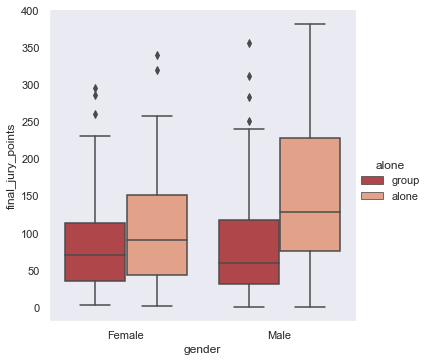

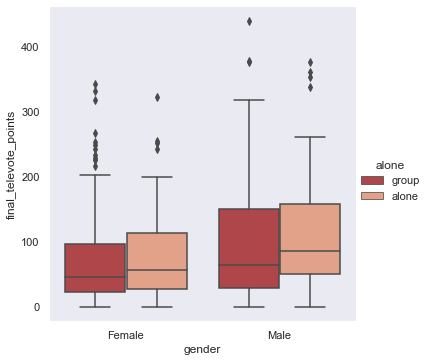

In [33]:
sn.catplot(data = finalists.loc[finalists['gender'] != 'Mix'], y = 'final_jury_points', x = 'gender', 
           hue = 'alone', kind = 'box')
sn.catplot(data = finalists.loc[finalists['gender'] != 'Mix'], y = 'final_televote_points', x = 'gender', 
           hue = 'alone', kind = 'box')

It seems that it's better to perform alone, especially if you are male. This preference is more visible among the jury. 

In [34]:
finalists.groupby(['performers_count']).agg({'performers_count': 'count', 'final_place': 'mean', 'final_total_points': 'mean'}).sort_values('final_place').round(2)

,performers_count,final_place,final_total_points
performers_count,,,
7,1,8.00,220.00
9,1,11.00,184.00
1,72,11.22,222.89
3,29,12.79,160.41
2,22,13.59,157.05
6,119,13.68,161.02
4,26,14.50,140.69
5,89,14.67,133.00


### Is there a recency bias?

Does the draw position in final has any significance?

In [35]:
finalists['final_draw_position'] = finalists['final_draw_position'].replace('-', np.nan)
finalists['final_draw_position'] = finalists['final_draw_position'].astype(float)
finalists['final_order'] = pd.cut(finalists['final_draw_position'], [0,5,10,15,20,27])
finalists['final_order'].value_counts()

(20, 27]    79
(0, 5]      70
(5, 10]     70
(15, 20]    70
(10, 15]    68
Name: final_order, dtype: int64

In [36]:
finalists[['final_place', 'final_total_points', 'final_draw_position']].corr()

,final_place,final_total_points,final_draw_position
final_place,1.000000,-0.778081,-0.168384
final_total_points,-0.778081,1.000000,0.160200
final_draw_position,-0.168384,0.160200,1.000000


In [37]:
order = finalists.groupby(['final_order']).agg({'final_order': 'count', 'final_place': 'mean', 'final_jury_points': 'mean', 'final_televote_points': 'mean',
                                       'winner': 'sum', 'top_3': 'sum'})
order.columns = ['Total #', 'Avg final place', 'Avg jury points', 'Avg televote points', 'Winner #', 'Top3 #']
order

,Total #,Avg final place,Avg jury points,Avg televote points,Winner #,Top3 #
final_order,,,,,,
"(0, 5]",70,16.771429,67.777778,48.158730,0,2
"(5, 10]",70,12.885714,95.687500,88.171875,2,7
"(10, 15]",68,12.338235,104.467742,108.064516,4,11
"(15, 20]",70,12.542857,91.184615,101.615385,4,8
"(20, 27]",79,12.506329,94.239437,104.366197,4,14


<AxesSubplot:xlabel='Top3 #', ylabel='final_order'>

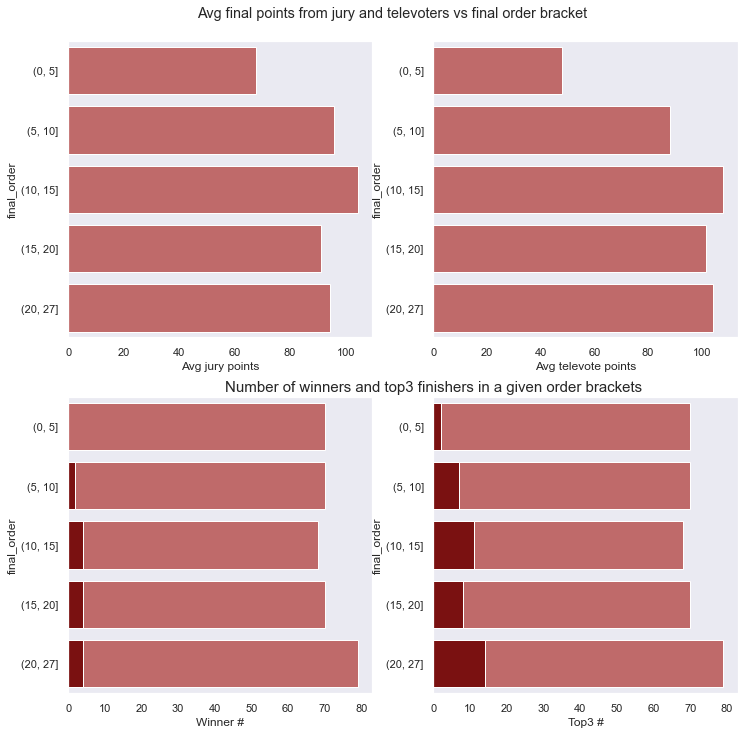

In [38]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (12,12))

plt.suptitle('Avg final points from jury and televoters vs final order bracket', y = 0.92)

sn.barplot(data = order.reset_index(), x = 'Avg jury points', y = 'final_order', color = 'indianred', ax = ax1)
sn.barplot(data = order.reset_index(), x = 'Avg televote points', y = 'final_order', color = 'indianred', ax = ax2)

plt.text(0, -0.6, 'Number of winners and top3 finishers in a given order brackets', size = 15, horizontalalignment='center')

sn.barplot(data = order.reset_index(), x = 'Total #', y = 'final_order', color = 'indianred', ax = ax3)
sn.barplot(data = order.reset_index(), x = 'Winner #', y = 'final_order', color = 'darkred', ax = ax3)
sn.barplot(data = order.reset_index(), x = 'Total #', y = 'final_order', color = 'indianred', ax = ax4)
sn.barplot(data = order.reset_index(), x = 'Top3 #', y = 'final_order', color = 'darkred', ax = ax4)

There is no clear evidence for a recency bias, however the performers who start the competition seem to be at significant disadvantage. Out of 70 songs that were performed at the begining of the show (first 5 performances) only 2 finished in top3. 

### What are the characteristics of the  average winning song?

In [39]:
finalists.loc[finalists['winner'] == 1].median(axis = 0)

year                     2015.5
final_draw_position        17.5
main_singers                1.0
BPM                       114.0
energy                     78.0
danceability               57.0
happiness                  34.5
acousticness               11.0
instrumentalness            0.0
liveness                   23.5
speechiness                 4.0
backing_dancers             0.0
backing_singers             0.0
backing_instruments         0.0
instrument_10               0.0
final_televote_points     318.0
final_jury_points         237.0
final_televote_votes       39.0
final_jury_votes           32.0
final_place                 1.0
final_total_points        531.5
favourite_10                1.0
host_10                     0.0
winner                      1.0
top_3                       1.0
performers_count            3.0
dtype: float64